In [1]:
import pandas as pd 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


matplotlib.rcParams["figure.figsize"] = (20, 10)


In [2]:
df1 = pd.read_csv("test kaggle.csv")

In [3]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df1.shape

(1459, 80)

In [5]:
df1_selected = df1[['LotArea','FullBath','BedroomAbvGr',]]                                                                                     

In [6]:
df1_selected

,LotArea,FullBath,BedroomAbvGr
0,11622,1,2
1,14267,1,3
2,13830,2,3
3,9978,2,3
4,5005,2,2
...,...,...,...
1454,1936,1,3
1455,1894,1,3
1456,20000,1,4
1457,10441,1,3


In [7]:
df2 =df1_selected.copy()

In [8]:
df2.head()

,LotArea,FullBath,BedroomAbvGr
0,11622,1,2
1,14267,1,3
2,13830,2,3
3,9978,2,3
4,5005,2,2


In [9]:
print(df2.isnull().sum())


LotArea         0
FullBath        0
BedroomAbvGr    0
dtype: int64


In [10]:
df2['BedroomAbvGr'].unique()

array([2, 3, 4, 1, 6, 5, 0])

In [11]:
df3 = df2.copy()
df3['bhk']= df3['BedroomAbvGr']
df3.drop('BedroomAbvGr', axis=1, inplace=True)
df3

,LotArea,FullBath,bhk
0,11622,1,2
1,14267,1,3
2,13830,2,3
3,9978,2,3
4,5005,2,2
...,...,...,...
1454,1936,1,3
1455,1894,1,3
1456,20000,1,4
1457,10441,1,3


In [12]:
df3.LotArea.unique()

array([11622, 14267, 13830, ...,  1894, 20000, 10441], shape=(1106,))

In [13]:
df3

,LotArea,FullBath,bhk
0,11622,1,2
1,14267,1,3
2,13830,2,3
3,9978,2,3
4,5005,2,2
...,...,...,...
1454,1936,1,3
1455,1894,1,3
1456,20000,1,4
1457,10441,1,3


In [14]:
df4 = df3.copy()
df4.head()

,LotArea,FullBath,bhk
0,11622,1,2
1,14267,1,3
2,13830,2,3
3,9978,2,3
4,5005,2,2


In [15]:
price_map ={
    0:5,
    1: 25,
    2: 35,
    3: 45,
    4: 55,
    5: 63,
    6:70}

In [16]:
df4['Price(lacs)'] = df4['bhk'].map(price_map)


In [17]:
df4.head()

,LotArea,FullBath,bhk,Price(lacs)
0,11622,1,2,35
1,14267,1,3,45
2,13830,2,3,45
3,9978,2,3,45
4,5005,2,2,35


In [18]:
df5=df4.copy()

In [19]:
df5

,LotArea,FullBath,bhk,Price(lacs)
0,11622,1,2,35
1,14267,1,3,45
2,13830,2,3,45
3,9978,2,3,45
4,5005,2,2,35
...,...,...,...,...
1454,1936,1,3,45
1455,1894,1,3,45
1456,20000,1,4,55
1457,10441,1,3,45


In [20]:
df5['price_per_sqft'] =  (df4['Price(lacs)']*100000 / df4['LotArea']).round(2).astype(str) 


df5.head()

,LotArea,FullBath,bhk,Price(lacs),price_per_sqft
0,11622,1,2,35,301.15
1,14267,1,3,45,315.41
2,13830,2,3,45,325.38
3,9978,2,3,45,450.99
4,5005,2,2,35,699.3


In [21]:
df5.price_per_sqft.describe()

count       1459
unique      1212
top       468.75
freq          15
Name: price_per_sqft, dtype: object

In [22]:
df5[df5.LotArea/df5.bhk<300].head()

,LotArea,FullBath,bhk,Price(lacs),price_per_sqft


In [23]:
df = df5.copy()
df

,LotArea,FullBath,bhk,Price(lacs),price_per_sqft
0,11622,1,2,35,301.15
1,14267,1,3,45,315.41
2,13830,2,3,45,325.38
3,9978,2,3,45,450.99
4,5005,2,2,35,699.3
...,...,...,...,...,...
1454,1936,1,3,45,2324.38
1455,1894,1,3,45,2375.92
1456,20000,1,4,55,275.0
1457,10441,1,3,45,430.99


In [24]:
# Remove non-numeric characters (₹, /sqft etc.) if any
df['price_per_sqft'] = df['price_per_sqft'].replace('[^\d.]', '', regex=True)

# Convert to float
df['price_per_sqft'] = df['price_per_sqft'].astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_3132\4263365726.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['price_per_sqft'] = df['price_per_sqft'].replace('[^\d.]', '', regex=True)


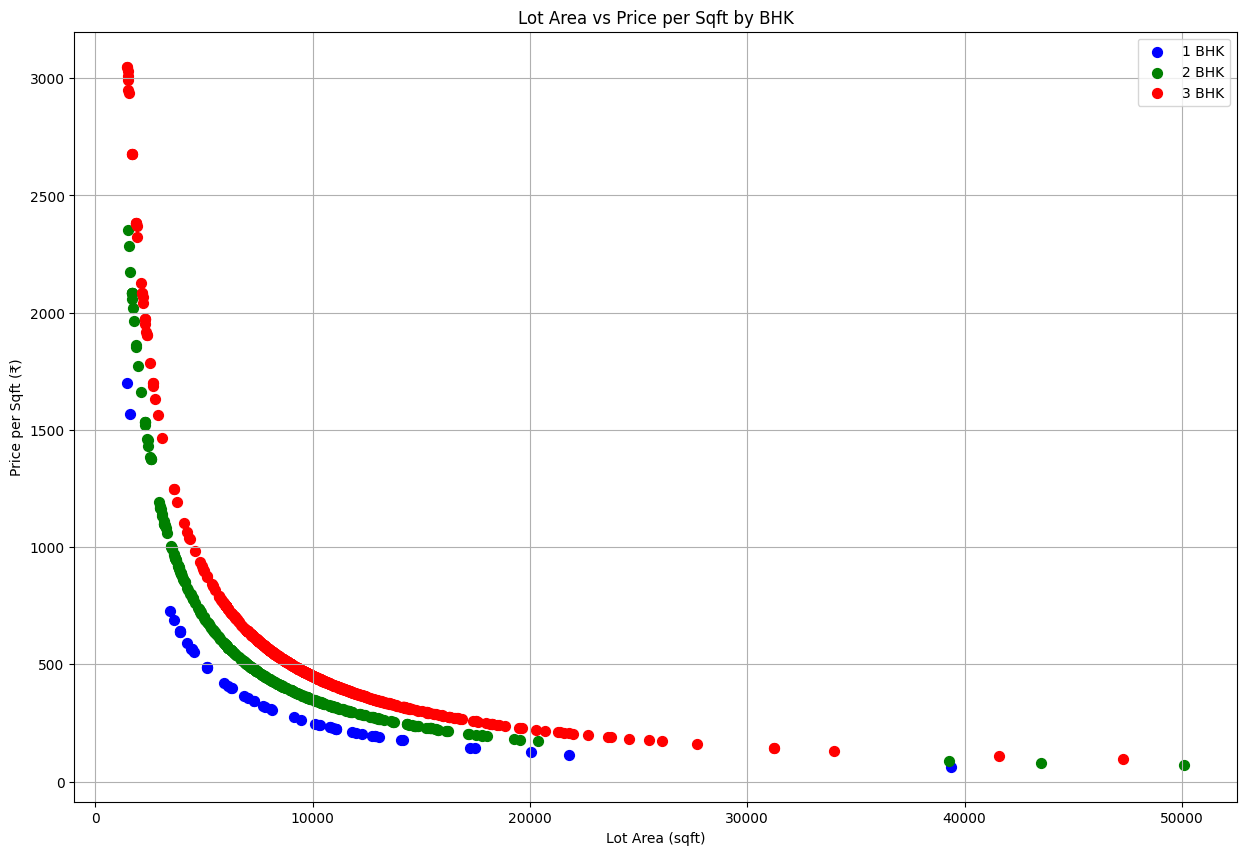

In [25]:

bhk1 = df[df.bhk == 1]
bhk2 = df[df.bhk == 2]
bhk3 = df[df.bhk == 3]

matplotlib.rcParams['figure.figsize'] = (15, 10)
plt.scatter(bhk1['LotArea'], bhk1['price_per_sqft'], color='blue', label='1 BHK', s=50)
plt.scatter(bhk2['LotArea'], bhk2['price_per_sqft'], color='green', label='2 BHK', s=50)
plt.scatter(bhk3['LotArea'], bhk3['price_per_sqft'], color='red', label='3 BHK', s=50)

plt.xlabel('Lot Area (sqft)')
plt.ylabel('Price per Sqft (₹)')
plt.title('Lot Area vs Price per Sqft by BHK')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
df
df['price_per_sqft'] = df['price_per_sqft'].replace(r'[^\d.]', '', regex=True).astype(float)

# Define X (features) and y (target)
X = df[['LotArea', 'FullBath', 'bhk']]
y = df['price_per_sqft']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 87280.10372071128
R² Score: 0.41697411821727337


In [30]:
# Example input: LotArea=5000, FullBath=2, bhk=3
new_data = pd.DataFrame([[5000, 2, 2]], columns=['LotArea', 'FullBath', 'bhk'])
prediction = model.predict(new_data)
print("Predicted Price per Sqft:", prediction[0])


Predicted Price per Sqft: 713.9879914788296


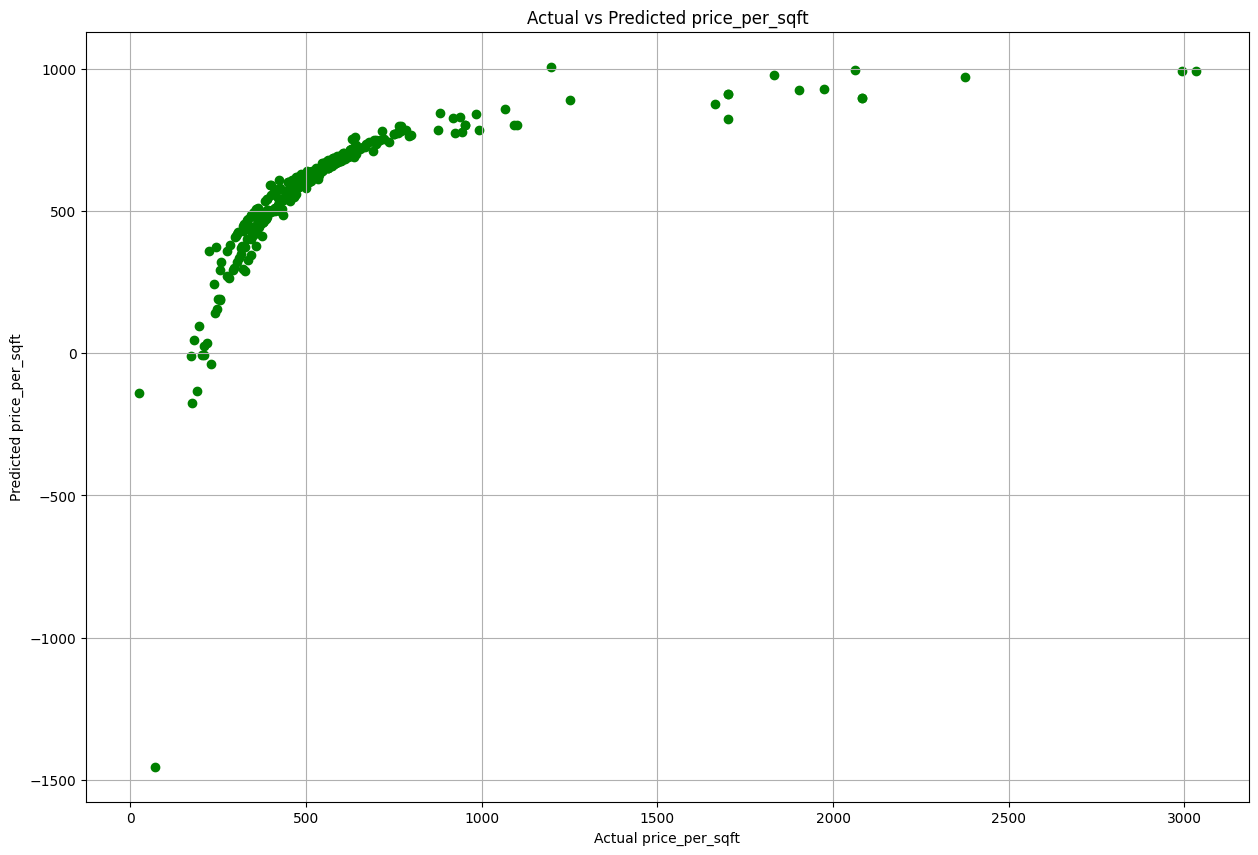

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual price_per_sqft')
plt.ylabel('Predicted price_per_sqft')
plt.title('Actual vs Predicted price_per_sqft')
plt.grid(True)
plt.show()
